In [1]:
import scipy
import numpy as np
import scipy.stats
import pandas as pd
import os
import statsmodels.formula.api as smf
import statsmodels.tools

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
os.getenv("PUIDATA")

'/Users/apple/Desktop/PUI2017/PUIdata'

# 0. data cleaning

### the first dataset 'World firearms murders and ownership' of 2012

In [3]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'World firearms murders and ownership - Sheet 1.csv')
df1.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [4]:
print(df1.shape)

(185, 9)


In [5]:
df1 = df1.drop(labels = ['ISO code', 'Source', '% of homicides by firearm', 'Rank by rate of ownership'], axis = 1)
df1 = df1.rename(columns = {'Country/Territory': 'Country',
                           'Average firearms per 100 people': 'Firearms per 100 people',
                           'Homicide by firearm rate per 100,000 pop': 'Homicide by firearm per 100,000 pop',
                           'Average total all civilian firearms':'Total civilian firearms'})
df1.head()

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
0,Albania,56.0,1.76,8.6,270000.0
1,Algeria,20.0,0.06,7.6,1900000.0
2,Angola,NaN,NaN,17.3,2800000.0
3,Anguilla,1.0,7.14,NaN,NaN
4,Argentina,1198.0,3.02,10.2,3950000.0


### the second dataset 'The number of gun owned vs. the number of mass shootings' (see: [here](https://datawrapper.dwcdn.net/pvLFI/4/))

In [6]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'data-pvLFI.csv')
df2.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [7]:
df2.shape

(25, 3)

In [8]:
# check the countries' names
df2[df2['Country'].isin(df1['Country'])==0]

,Country,Guns/100 inhabitants,Number of mass shootings
2,Beligium,17.2,2
9,Holland,3.9,2
23,United Kingdom,6.2,3


### why these 3 countries are not in df1? we need to find out

In [9]:
df1[df1['Country'].str.contains('England')]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
52,England and Wales,41.0,0.07,6.2,3400000.0


In [10]:
df1[df1['Country'].str.contains('Scotland')]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
145,Scotland,NaN,NaN,5.5,280000.0


In [11]:
df1[df1['Country'].str.contains('Net')]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
121,Netherlands,55.0,0.33,3.9,510000.0


In [12]:
df1[df1['Country'].str.contains('Belgium')]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
14,Belgium,70.0,0.68,17.2,1800000.0


### From above, we could know that the 3 missing countries are UK, Netherlands and Belgium, which are all in df1.
### and because the 'Average firearms per 100 people' of 'England and Wales' in df1 exactly = df2, so we consider that is the data of  'England and Wales' not 'United Kingdoms'(also with scotland)
### we replace the countries' name and merge df1 and df2

In [13]:
df2.replace(['Beligium', 'Holland', 'United Kingdom'],['Belgium','Netherlands', 'England and Wales'], 
            inplace = True)

In [14]:
df1_2 = pd.merge(df1, df2, how = 'inner')
df1_2.shape

(25, 7)

In [15]:
## to check does the column 'Firearms per 100 people' and 'Guns/100 inhabitants' exactly the same
sum(df1_2['Firearms per 100 people'] != df1_2['Guns/100 inhabitants'])

0

In [16]:
## the answer is yes, so we delete one column
df1_2 = df1_2.drop(labels = ['Guns/100 inhabitants'], axis = 1)
df1_2.head()

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms,Number of mass shootings
0,Australia,30.0,0.14,15.0,3050000.0,4
1,Austria,18.0,0.22,30.4,2500000.0,1
2,Belgium,70.0,0.68,17.2,1800000.0,2
3,Canada,173.0,0.51,30.8,9950000.0,4
4,Denmark,15.0,0.27,12.0,650000.0,0


## the third dataset  'the world population' from world bank (see [here](https://data.worldbank.org/indicator/SP.POP.TOTL))

the csv file is a little tricky, because the first three lines is not part of the table, we need to clean the  data from the fourth line

In [17]:
with open(os.getenv("PUIDATA") + "/" + 'POP.csv') as f:
    line = f.readlines()
    data = []
    for row in line[4:]:
        data.append(pd.DataFrame(row.split(',')[:-1]).T)
        

In [18]:
df3 = pd.concat(data)
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,"""Country Name""","""Country Code""","""Indicator Name""","""Indicator Code""","""1960""","""1961""","""1962""","""1963""","""1964""","""1965""",...,"""2009""","""2010""","""2011""","""2012""","""2013""","""2014""","""2015""","""2016""",NaN,NaN
0,"""Aruba""","""ABW""","""Population","total""","""SP.POP.TOTL""","""54211""","""55438""","""56225""","""56695""","""57032""",...,"""101353""","""101453""","""101669""","""102053""","""102577""","""103187""","""103795""","""104341""","""104822""",NaN
0,"""Afghanistan""","""AFG""","""Population","total""","""SP.POP.TOTL""","""8996351""","""9166764""","""9345868""","""9533954""","""9731361""",...,"""27294031""","""28004331""","""28803167""","""29708599""","""30696958""","""31731688""","""32758020""","""33736494""","""34656032""",NaN
0,"""Angola""","""AGO""","""Population","total""","""SP.POP.TOTL""","""5643182""","""5753024""","""5866061""","""5980417""","""6093321""",...,"""21759420""","""22549547""","""23369131""","""24218565""","""25096150""","""25998340""","""26920466""","""27859305""","""28813463""",NaN
0,"""Albania""","""ALB""","""Population","total""","""SP.POP.TOTL""","""1608800""","""1659800""","""1711319""","""1762621""","""1814135""",...,"""2947314""","""2927519""","""2913021""","""2905195""","""2900401""","""2895092""","""2889104""","""2880703""","""2876101""",NaN


In [19]:
# reset the first line(the fourth line of the original csv) to be columns' name
df3.columns = df3.iloc[0,:]
df3 = df3.iloc[1:, :].reset_index(drop = True)

In [20]:
df3.rename(columns = {'"Country Name"':'Country','"2012"':'2012'}, inplace = True)
df3 = df3[['Country', '2012']]
df3.head()

,Country,2012
0,"""Aruba""","""102053"""
1,"""Afghanistan""","""29708599"""
2,"""Angola""","""24218565"""
3,"""Albania""","""2905195"""
4,"""Andorra""","""83751"""


In [21]:
df3.shape

(264, 2)

In [22]:
# the values seem awful, clean them
country = []
pop = []
for x in list(df3['Country']):
    country.append(x[1:-1])

# when I first time to transfer the type of pop into float, something wrong, so I need to figure it out
i = 0
for y in list(df3['2012']):
    i += 1
    try:
        pop.append(float(y[1:-1]))
    except:
        print(i)


109


In [23]:
# fine the stupid one
df3['2012'][108]

'""'

In [24]:
# and drop it
df3.drop([108], axis = 0, inplace = True)
df3.shape


(263, 2)

In [25]:
# do above porcess again. a clean table done!
country = []
pop = []
for x in list(df3['Country']):
    country.append(x[1:-1])


for y in list(df3['2012']):
    pop.append(int(float(y[1:-1])))

df3 = pd.DataFrame({'Country': country, 'pop':pop})
df3.head()

,Country,pop
0,Aruba,102053
1,Afghanistan,29708599
2,Angola,24218565
3,Albania,2905195
4,Andorra,83751


### merge df1&2&3
 because there's 'United Kingdom' but not 'England and Wales' in df3, so we change the 'country' value name, 
 although it is not accurate to the df1 and df2

In [26]:
df1_2_3 = pd.merge(df1_2.replace(['England and Wales'], ['United Kingdom']), df3, how = 'inner')
df1_2_3.shape

(25, 7)

In [27]:
# seems not bad
df1_2_3.head()

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms,Number of mass shootings,pop
0,Australia,30.0,0.14,15.0,3050000.0,4,22340024
1,Austria,18.0,0.22,30.4,2500000.0,1,8391643
2,Belgium,70.0,0.68,17.2,1800000.0,2,11047744
3,Canada,173.0,0.51,30.8,9950000.0,4,34342780
4,Denmark,15.0,0.27,12.0,650000.0,0,5570572


## the fourth dataset  'the world gdp' from world bank (see [here](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD))

the csv file is tricky like dataset 3, we clean it using the same method

In [28]:
with open(os.getenv("PUIDATA") + "/" + 'GDP.csv') as f2:
    line2 = f2.readlines()
    data2 = []
    for row in line2[4:]:
        data2.append(pd.DataFrame(row.split(',')[:-1]).T)

In [29]:
df4 = pd.concat(data2)
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,"""Country Name""","""Country Code""","""Indicator Name""","""Indicator Code""","""1960""","""1961""","""1962""","""1963""","""1964""","""1965""",...,"""2008""","""2009""","""2010""","""2011""","""2012""","""2013""","""2014""","""2015""","""2016""",NaN
0,"""Aruba""","""ABW""","""GDP (current US$)""","""NY.GDP.MKTP.CD""","""""","""""","""""","""""","""""","""""",...,"""2791960893.85475""","""2498932960.89385""","""2467703910.61453""","""2584463687.15084""","""""","""""","""""","""""","""""",NaN
0,"""Afghanistan""","""AFG""","""GDP (current US$)""","""NY.GDP.MKTP.CD""","""537777811.111111""","""548888895.555556""","""546666677.777778""","""751111191.111111""","""800000044.444444""","""1006666637.77778""",...,"""10190529882.4878""","""12486943505.7381""","""15936800636.2487""","""17930239399.8149""","""20536542736.7297""","""20046334303.9661""","""20050189881.6659""","""19702986340.5494""","""19469022207.6357""",NaN
0,"""Angola""","""AGO""","""GDP (current US$)""","""NY.GDP.MKTP.CD""","""""","""""","""""","""""","""""","""""",...,"""84178032716.0971""","""75492384801.3695""","""82470913120.7314""","""104115923082.737""","""115398371427.673""","""124912063308.202""","""126776874216.703""","""102962245246.708""","""89633156470.3104""",NaN
0,"""Albania""","""ALB""","""GDP (current US$)""","""NY.GDP.MKTP.CD""","""""","""""","""""","""""","""""","""""",...,"""12881352687.7773""","""12044212903.8168""","""11926953258.916""","""12890867538.5302""","""12319784787.2987""","""12781029643.5936""","""13219857459.1009""","""11390365293.8057""","""11926892452.8499""",NaN


## repeat the cleaning process like dataset3

In [30]:
df4.columns = df4.iloc[0,:]
df4 = df4.iloc[1:, :].reset_index(drop = True)
df4.rename(columns = {'"Country Name"':'Country','"2012"':'2012'}, inplace = True)
df4 = df4[['Country', '2012']]
df4.head()

,Country,2012
0,"""Aruba""",""""""
1,"""Afghanistan""","""20536542736.7297"""
2,"""Angola""","""115398371427.673"""
3,"""Albania""","""12319784787.2987"""
4,"""Andorra""","""3146151869.45908"""


In [31]:
i = 0
droplist = []
for y in list(df4['2012']):
    i += 1
    try:
        pop.append(float(y[1:-1]))
    except:
        droplist.append(i-1)

        
df4.drop(droplist, axis = 0, inplace = True)


country4 = []
gdp = []
for x in list(df4['Country']):
    country4.append(x[1:-1])


for y in list(df4['2012']):
    gdp.append(int(float(y[1:-1])))

df4 = pd.DataFrame({'Country': country4, 'gdp':gdp})
df4.head()

,Country,gdp
0,Afghanistan,20536542736
1,Angola,115398371427
2,Albania,12319784787
3,Andorra,3146151869
4,Arab World,2740536188974


In [32]:
print(df3.shape, df4.shape)

(263, 2) (245, 2)


## Merge the four dataset together

In [33]:
df1_2_3_4 = pd.merge(df1_2_3, df4, how = 'inner')
df1_2_3_4.shape

(25, 8)

In [34]:
# We get what we want!
df1_2_3_4.head()

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms,Number of mass shootings,pop,gdp
0,Australia,30.0,0.14,15.0,3050000.0,4,22340024,1538194473087
1,Austria,18.0,0.22,30.4,2500000.0,1,8391643,407451583084
2,Belgium,70.0,0.68,17.2,1800000.0,2,11047744,497884088082
3,Canada,173.0,0.51,30.8,9950000.0,4,34342780,1824288757447
4,Denmark,15.0,0.27,12.0,650000.0,0,5570572,327148899962


In [35]:
df1_2_3_4.describe()

,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms,Number of mass shootings,pop,gdp
count,25.000000,25.000000,25.000000,2.500000e+01,25.000000,2.500000e+01,2.500000e+01
mean,421.000000,0.405200,22.288000,1.455940e+07,4.760000,3.840318e+07,1.744021e+12
std,1819.767865,0.582109,19.001849,5.354988e+07,15.379315,6.494906e+07,3.320953e+12
min,0.000000,0.000000,0.600000,7.000000e+04,0.000000,3.190140e+05,1.421858e+10
25%,15.000000,0.090000,8.600000,6.500000e+05,0.000000,5.570572e+06,2.456707e+11
50%,35.000000,0.260000,17.200000,2.400000e+06,1.000000,1.104774e+07,5.097049e+11
75%,57.000000,0.480000,30.800000,3.400000e+06,3.000000,4.674270e+07,1.824289e+12
max,9146.000000,2.970000,88.800000,2.700000e+08,78.000000,3.116634e+08,1.615526e+13


## By now, we get a clean table including 25 countries' data about number of firearms, homicides by firearm and mass shootings, and also the data of gdp and population.
## Let's start exploring!
## Why only 25 countries? Because it's decided by the availability of mass shootings' data. So if we explore the relationship between varialbes not including number of mass shootings, we will use other table, like df1 directly. Doing by this way will include as many observations as possible.


In [36]:
# Show the integrated data table 
df1_2_3_4

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms,Number of mass shootings,pop,gdp
0,Australia,30.0,0.14,15.0,3050000.0,4,22340024,1538194473087
1,Austria,18.0,0.22,30.4,2500000.0,1,8391643,407451583084
2,Belgium,70.0,0.68,17.2,1800000.0,2,11047744,497884088082
3,Canada,173.0,0.51,30.8,9950000.0,4,34342780,1824288757447
4,Denmark,15.0,0.27,12.0,650000.0,0,5570572,327148899962
5,United Kingdom,41.0,0.07,6.2,3400000.0,3,63258918,2646002634059
6,Finland,24.0,0.45,45.3,2400000.0,2,5388272,256706466091
7,France,35.0,0.06,31.2,19000000.0,6,65342776,2681416108537
8,Germany,158.0,0.19,30.3,25000000.0,7,80274983,3543983909148
9,Greece,29.0,0.26,22.5,2500000.0,0,11104899,245670666639


# 1. plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?

In [37]:
m_g = df1_2_3_4[['Country','gdp','pop','Number of mass shootings']]
m_g.is_copy = False
m_g['gdp(thousand $) per capita'] = m_g['gdp']/m_g['pop']/1000
m_g['mass shootings per 10 million people'] = m_g['Number of mass shootings']/m_g['pop'] * 10000000
m_g['pop(million)'] = m_g['pop']/1000000
m_g['gdp(trillion $)'] = m_g['gdp']/1000000000000
m_g.head()

,Country,gdp,pop,Number of mass shootings,gdp(thousand $) per capita,mass shootings per 10 million people,pop(million),gdp(trillion $)
0,Australia,1538194473087,22340024,4,68.853752,1.790508,22.340024,1.538194
1,Austria,407451583084,8391643,1,48.554447,1.191662,8.391643,0.407452
2,Belgium,497884088082,11047744,2,45.066584,1.810324,11.047744,0.497884
3,Canada,1824288757447,34342780,4,53.120008,1.164728,34.342780,1.824289
4,Denmark,327148899962,5570572,0,58.728062,0.000000,5.570572,0.327149


### mass shooting vs gdp in absolute numbers(with y errorbars)

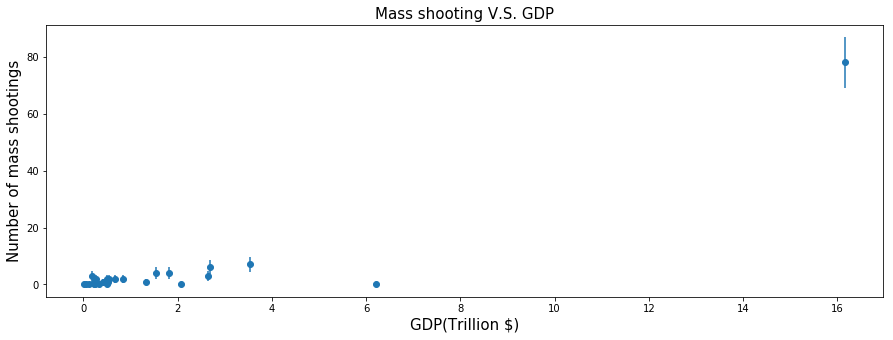

In [38]:
plt.figure(figsize = (15,5))
plt.scatter(m_g['gdp(trillion $)'], m_g['Number of mass shootings'])
plt.errorbar(m_g['gdp(trillion $)'], m_g['Number of mass shootings'], 
             yerr = np.sqrt(m_g['Number of mass shootings']), fmt = '.')
plt.xlabel('GDP(Trillion $)', fontsize = 15)
plt.ylabel('Number of mass shootings', fontsize = 15)
plt.title('Mass shooting V.S. GDP', fontsize = 15)

### there are outlier with mass shootings more than 60 and GDP more than 14 trillion, we could filter it out

In [39]:
m_g[m_g['Number of mass shootings'] > 60]

,Country,gdp,pop,Number of mass shootings,gdp(thousand $) per capita,mass shootings per 10 million people,pop(million),gdp(trillion $)
24,United States,16155255000000,311663358,78,51.835593,2.5027,311.663358,16.155255


In [40]:
m_g[m_g['gdp(trillion $)'] > 14]

,Country,gdp,pop,Number of mass shootings,gdp(thousand $) per capita,mass shootings per 10 million people,pop(million),gdp(trillion $)
24,United States,16155255000000,311663358,78,51.835593,2.5027,311.663358,16.155255


### from the table below, we could see the outlier is United States with 78 mass shootings  and 16 trillion GDP . Both are way larger than other 24 countries.

### mass shooting vs gdp per person(with x errorbars and y errorbars)

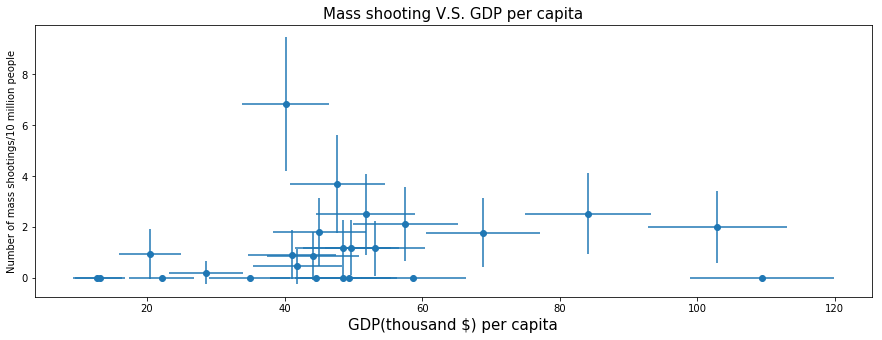

In [41]:
plt.figure(figsize = (15,5))
plt.scatter(m_g['gdp(thousand $) per capita'], m_g['mass shootings per 10 million people'])
plt.errorbar(m_g['gdp(thousand $) per capita'], m_g['mass shootings per 10 million people'], 
             xerr = np.sqrt(m_g['gdp(thousand $) per capita']),
             yerr = np.sqrt(m_g['mass shootings per 10 million people']), fmt = '.')
plt.xlabel('GDP(thousand $) per capita', fontsize = 15)
plt.ylabel('Number of mass shootings/10 million people', fontsize = 10)
plt.title('Mass shooting V.S. GDP per capita', fontsize = 15)

### there no outliers in the above plot
### It seems that for data per capita, US is no longer outstanding, for neither mass shooting(2.5/10m) nor gdp(51836/capita) 


In [42]:
m_g[m_g['Country'] == 'United States']

,Country,gdp,pop,Number of mass shootings,gdp(thousand $) per capita,mass shootings per 10 million people,pop(million),gdp(trillion $)
24,United States,16155255000000,311663358,78,51.835593,2.5027,311.663358,16.155255


# 2. plot the average number of civilian fire arms per person
first without errors, then with errors. are there points that look like outliers?

In [43]:
firearms_100 = df1['Firearms per 100 people'].dropna()
len(firearms_100)

176

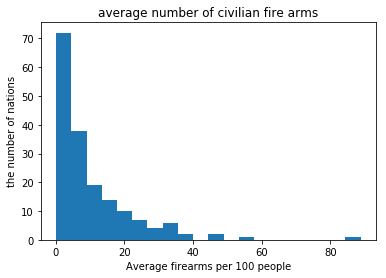

In [44]:
plt.hist(firearms_100, bins = 20)
plt.title('average number of civilian fire arms')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('the number of nations')

### there are outlier larger than 80 per 100 people , we could filter it out

In [45]:
df1[df1['Firearms per 100 people'] > 40]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
58,Finland,24.0,0.45,45.3,2400000.0
162,Switzerland,57.0,0.77,45.7,3400000.0
176,United States,9146.0,2.97,88.8,270000000.0
182,Yemen,NaN,NaN,54.8,11500000.0


### from the table above, we could see the outlier is United States with 89 average firearms per 100 people, much larger than the second one Yemen with 55

# 3.plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

## 3.1 average number of homicide by fire arms per person

In [46]:
homicide_100000 = df1['Homicide by firearm per 100,000 pop'].dropna()
len(homicide_100000)

116

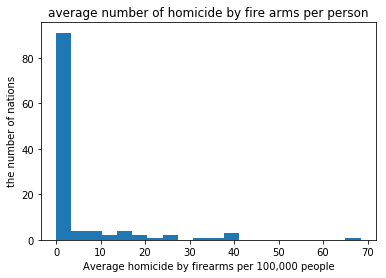

In [47]:
plt.hist(homicide_100000, bins = 20)
plt.title('average number of homicide by fire arms per person')
plt.xlabel('Average homicide by firearms per 100,000 people')
plt.ylabel('the number of nations')

### there are outlier larger than 50 homicide by firearms per 100,000 people , we could filter it out


In [48]:
df1[df1['Homicide by firearm per 100,000 pop'] > 30]

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms
51,El Salvador,2446.0,39.90,5.8,400000.0
67,Guatemala,5009.0,34.81,13.1,1650000.0
72,Honduras,5201.0,68.43,6.2,500000.0
83,Jamaica,1080.0,39.40,8.1,215000.0
142,Saint Kitts and Nevis,17.0,32.44,NaN,NaN
179,Venezuela,11115.0,38.97,10.7,2850000.0


### from the table above, we could see the outlier is Honduras with 68 homicide by firearms per 100,000 people, while others are all below 40

## 3.2 average number of homicide by fire arms per person vs GDP

In [49]:
df1_4 = pd.merge(df1.replace(['England and Wales'], ['United Kingdom']), df4, how = 'inner')
df1_4.shape

(153, 6)

In [50]:
df1_4.head()

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms,gdp
0,Albania,56.0,1.76,8.6,270000.0,12319784787
1,Algeria,20.0,0.06,7.6,1900000.0,209047389309
2,Angola,NaN,NaN,17.3,2800000.0,115398371427
3,Argentina,1198.0,3.02,10.2,3950000.0,545982375701
4,Armenia,9.0,0.29,12.5,380000.0,10619320048


In [51]:
h_g = df1_4[['Homicide by firearm per 100,000 pop', 'gdp']]
h_g.is_copy = False
h_g['gdp(trillion $)'] = h_g['gdp']/1000000000000
h_g.head()

,"Homicide by firearm per 100,000 pop",gdp,gdp(trillion $)
0,1.76,12319784787,0.012320
1,0.06,209047389309,0.209047
2,NaN,115398371427,0.115398
3,3.02,545982375701,0.545982
4,0.29,10619320048,0.010619


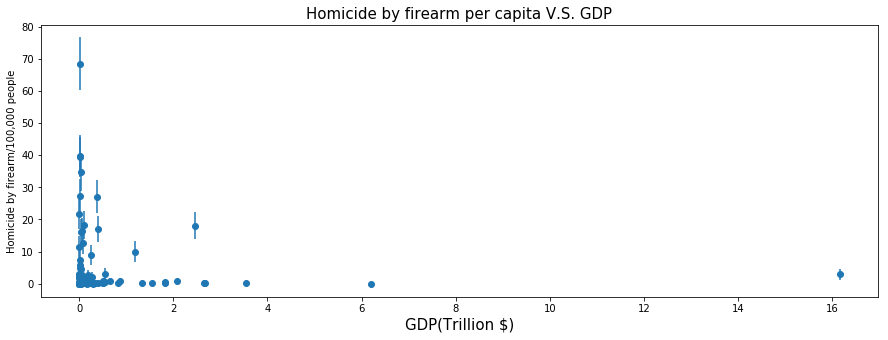

In [52]:
plt.figure(figsize = (15,5))
plt.scatter(h_g['gdp(trillion $)'], h_g['Homicide by firearm per 100,000 pop'])
plt.errorbar(h_g['gdp(trillion $)'], h_g['Homicide by firearm per 100,000 pop'], 
             yerr = np.sqrt(h_g['Homicide by firearm per 100,000 pop']), fmt = '.')
plt.xlabel('GDP(Trillion $)', fontsize = 15)
plt.ylabel('Homicide by firearm/100,000 people', fontsize = 10)
plt.title('Homicide by firearm per capita V.S. GDP', fontsize = 15)


### US is still an outlier for its GDP but not for homicide by firearm per capita

# 4.plot the number of  homicides by fire arm against the number of civilian firearms. (plot the  US in a different color)
with and without errorbars

In [53]:
h_f = df1[['Country','Firearms per 100 people','Homicide by firearm per 100,000 pop']].dropna()

In [54]:
len(h_f)

107

In [55]:
h_f = h_f.rename(columns = {'Firearms per 100 people':'x','Homicide by firearm per 100,000 pop':'y'})

In [56]:
h_f.head()

,Country,x,y
0,Albania,8.6,1.76
1,Algeria,7.6,0.06
4,Argentina,10.2,3.02
5,Armenia,12.5,0.29
6,Australia,15.0,0.14


In [57]:
h_f_us = h_f[h_f['Country'] == 'United States']
h_f_us

,Country,x,y
176,United States,88.8,2.97


### number of  homicides by firearms per capita against number of firearms per capita (without errorbars)

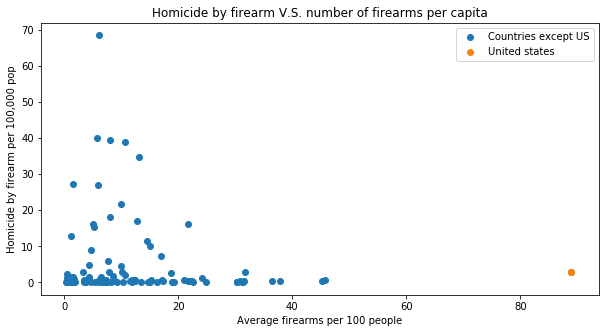

In [58]:
plt.figure(figsize = (10,5))
plt.scatter(h_f.x, h_f.y, label = 'Countries except US')
plt.scatter(h_f_us.x, h_f_us.y, label = 'United states')
plt.title('Homicide by firearm V.S. number of firearms per capita')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('Homicide by firearm per 100,000 pop')
plt.legend()

### number of  homicides by firearms per capita against number of firearms per capita  (with errorbars)

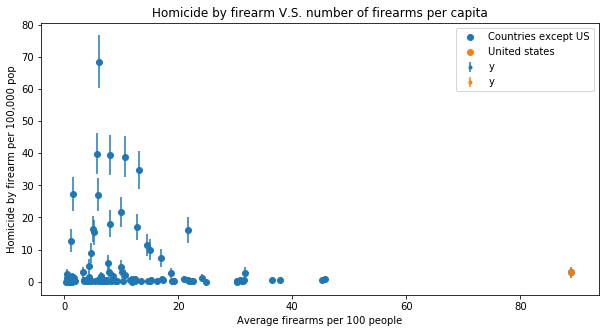

In [59]:
plt.figure(figsize = (10,5))
plt.scatter(h_f.x, h_f.y, label = 'Countries except US')
plt.scatter(h_f_us.x, h_f_us.y, label = 'United states')
plt.title('Homicide by firearm V.S. number of firearms per capita')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('Homicide by firearm per 100,000 pop')

plt.errorbar(h_f.x, h_f.y, yerr = np.sqrt(h_f.y), fmt = '.') 
plt.errorbar(h_f_us.x, h_f_us.y, yerr = np.sqrt(h_f_us.y), fmt = '.') 
plt.legend()

## From the above plot, we could see that although United States has the highest firearms rate per capita(88.8/100), its homicide rate by firearms(2.97/100,000) is not outstanding among 107 countries in 2012

# 5. plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars

In [60]:
m_f = df1_2[['Country','Firearms per 100 people','Number of mass shootings']].dropna()

In [61]:
len(m_f)

25

In [62]:
m_f = m_f.rename(columns = {'Firearms per 100 people':'x','Number of mass shootings':'y'})

In [63]:
m_f.head()

,Country,x,y
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [64]:
m_f_us = m_f[m_f['Country'] == 'United States']
m_f_us

,Country,x,y
24,United States,88.8,78


### number of  mass shootings against number of firearms per capita (without errorbars)

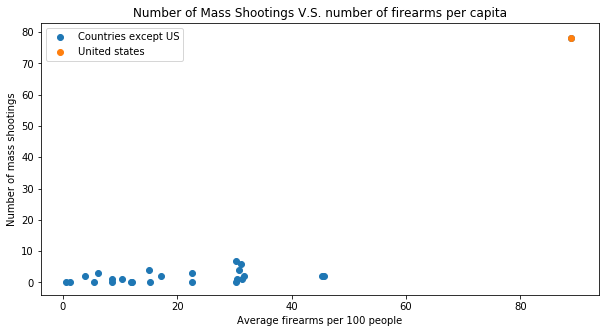

In [65]:
plt.figure(figsize = (10,5))
plt.scatter(m_f.x, m_f.y, label = 'Countries except US')
plt.scatter(m_f_us.x, m_f_us.y, label = 'United states')
plt.title('Number of Mass Shootings V.S. number of firearms per capita')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('Number of mass shootings')
plt.legend()

### number of mass shootings against number of firearms per capita (with errorbars)

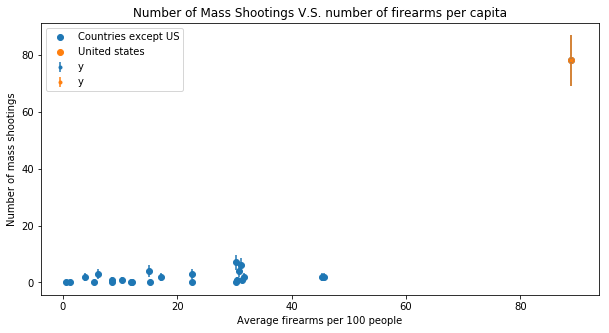

In [66]:
plt.figure(figsize = (10,5))
plt.scatter(m_f.x, m_f.y, label = 'Countries except US')
plt.scatter(m_f_us.x, m_f_us.y, label = 'United states')
plt.title('Number of Mass Shootings V.S. number of firearms per capita')
plt.xlabel('Average firearms per 100 people')
plt.ylabel('Number of mass shootings')

plt.errorbar(m_f.x, m_f.y, yerr = np.sqrt(m_f.y), fmt = '.') 
plt.errorbar(m_f_us.x, m_f_us.y, yerr = np.sqrt(m_f_us.y), fmt = '.') 
plt.legend()

## From the above plot, we could see that United States has the highest firearms rate per capita(88.8/100) and the most numerous mass shootings(78) among 25 countres in 2012

# 6. Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [67]:
df1_2_3.head()

,Country,Number of homicides by firearm,"Homicide by firearm per 100,000 pop",Firearms per 100 people,Total civilian firearms,Number of mass shootings,pop
0,Australia,30.0,0.14,15.0,3050000.0,4,22340024
1,Austria,18.0,0.22,30.4,2500000.0,1,8391643
2,Belgium,70.0,0.68,17.2,1800000.0,2,11047744
3,Canada,173.0,0.51,30.8,9950000.0,4,34342780
4,Denmark,15.0,0.27,12.0,650000.0,0,5570572


In [68]:
df_new = df1_2_3[['Country', 'Firearms per 100 people', 'Number of mass shootings', 'pop']]

In [69]:
df_new.is_copy = False

In [70]:
df_new['mass shootings per 10 million people'] = df_new['Number of mass shootings']/df_new['pop'] * 10000000

In [71]:
df_new.head()

,Country,Firearms per 100 people,Number of mass shootings,pop,mass shootings per 10 million people
0,Australia,15.0,4,22340024,1.790508
1,Austria,30.4,1,8391643,1.191662
2,Belgium,17.2,2,11047744,1.810324
3,Canada,30.8,4,34342780,1.164728
4,Denmark,12.0,0,5570572,0.000000


In [72]:
m_f_lm = df_new[['mass shootings per 10 million people', 
                  'Firearms per 100 people']].rename(columns = {'Firearms per 100 people': 'x', 
                                                                'mass shootings per 10 million people':'y'})

In [73]:
m_f_lm.head()

,y,x
0,1.790508,15.0
1,1.191662,30.4
2,1.810324,17.2
3,1.164728,30.8
4,0.000000,12.0


## OLS
[LINK](https://github.com/fedhere/PUI2017_fb55/blob/master/HW5_fb55/Linear%20Regression%20and%20OLS%20notes.pdf)

In [74]:
lm = smf.ols(formula='y ~ x', data = m_f_lm).fit()

In [75]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     5.739
Date:                Thu, 19 Oct 2017   Prob (F-statistic):             0.0251
Time:                        19:40:47   Log-Likelihood:                -43.327
No. Observations:                  25   AIC:                             90.65
Df Residuals:                      23   BIC:                             93.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3934      0.445      0.883      0.3

In [76]:
lm.params

Intercept    0.393355
x            0.036733
dtype: float64

In [77]:
lm.predict(m_f_lm[['x']])

array([ 0.94435411,  1.51004689,  1.02516736,  1.52474021,  0.83415422,
        0.62110109,  2.05737302,  1.53943353,  1.50637356,  1.21985384,
        0.59538778,  1.50637356,  0.709261  ,  0.83048089,  0.41539462,
        0.9553741 ,  0.53661451,  1.22352717,  1.54310686,  0.44110793,
        0.70558767,  0.77538094,  1.55412684,  2.07206634,  3.65527146])

y = 0.0367 * x +0.39, R square: 0.2


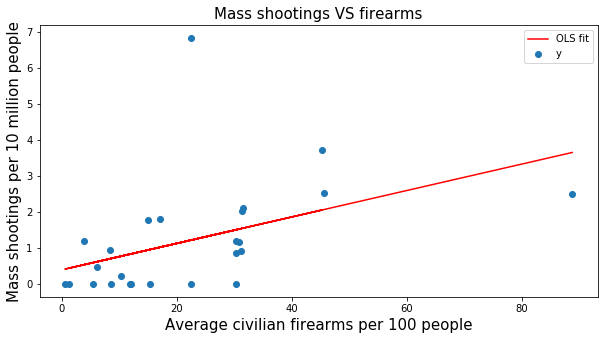

In [78]:
plt.figure(figsize=(10,5))
plt.scatter(m_f_lm.x, m_f_lm.y, label = 'y')
plt.plot(m_f_lm.x, lm.predict(m_f_lm[['x']]), c="r", label = 'OLS fit')
plt.xlabel('Average civilian firearms per 100 people', fontsize = 15)
plt.ylabel('Mass shootings per 10 million people', fontsize = 15)
plt.title('Mass shootings VS firearms', fontsize = 15)
plt.legend()
text = 'y = ' + str(round(lm.params[1], 4)) + ' * x +' + str(round(lm.params[0],2)) + ', R square: ' + str(round(lm.rsquared,3))

print(text)
plt.show()

## WLS 
WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors: weights = 1.0/df.yerror Notice that a - sqrt(0) = 0 b - 1/0 = infinity c - you cannot have weight that are infinity in your fit.

In [79]:
# find a solution to solve the 1/0 problem
weights = []
for i in m_f_lm.y:
    if i != 0:
        weights.append(1/np.sqrt(i))
    else:
        weights.append(1/np.sqrt(min(m_f_lm.y[m_f_lm.y != 0])))

In [80]:
weights

[0.74732897709108004,
 0.91605911381307703,
 0.74322755600152501,
 0.92659025464333489,
 2.1620059435625985,
 1.4521124612095304,
 0.51905067190015275,
 1.0435737955059368,
 1.0708806989709785,
 2.1620059435625985,
 2.1620059435625985,
 2.1620059435625985,
 2.1620059435625985,
 2.1620059435625985,
 2.1620059435625985,
 2.1620059435625985,
 0.91359383754489065,
 0.38227389831550534,
 0.70378178436217009,
 2.1620059435625985,
 1.0274998783454916,
 2.1620059435625985,
 0.68735773073414985,
 0.62898322712135968,
 0.63211423626770791]

In [81]:
wls = smf.WLS(m_f_lm['y'], m_f_lm['x'], weights = weights).fit()

y = 0.0367 * x +0.39, R square: 0.2


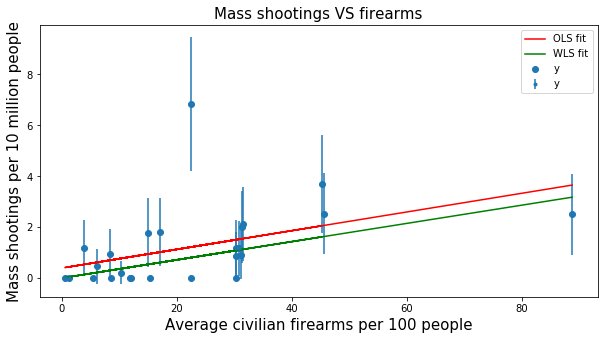

In [82]:
plt.figure(figsize=(10,5))
plt.scatter(m_f_lm.x, m_f_lm.y, label = 'y')
plt.plot(m_f_lm.x, lm.predict(m_f_lm[['x']]), c="r", label = 'OLS fit')
plt.plot(m_f_lm.x, wls.predict(m_f_lm[['x']]), c="g", label = 'WLS fit')
plt.errorbar(m_f_lm.x, m_f_lm.y, yerr = np.sqrt(m_f_lm.y), fmt = '.') 

plt.xlabel('Average civilian firearms per 100 people', fontsize = 15)
plt.ylabel('Mass shootings per 10 million people', fontsize = 15)
plt.title('Mass shootings VS firearms', fontsize = 15)
plt.legend()
text = 'y = ' + str(round(lm.params[1], 4)) + ' * x +' + str(round(lm.params[0],2)) + ', R square: ' + str(round(lm.rsquared,3))

print(text)
plt.show()